$$Diego \space Castillo \space Reyes$$
<h1 align="center">Circuito cuantico de periodicidad</h1>
Crea un cicuito cuantico que te devuelva la periodicidad del ejemplo visto en clase

$|x \qquad f(x) \rangle$

$|0 \qquad 2\rangle \quad \to \quad |00 \qquad 010 \rangle$

$|1 \qquad 4\rangle \quad \to \quad |01 \qquad 100 \rangle$

$|2 \qquad 2\rangle \quad \to \quad |10 \qquad 010 \rangle$

$|3 \qquad 4\rangle \quad \to \quad |11 \qquad 100 \rangle$

Para obtener los valores de f(x) a partir de los valores de x se aplican hadamard a los primeros 2 qubits para generar los numeros del 0 al 3 y luego aplicamos las siguientes compuertas:

$X_{q_3}$, $CX_{(q_1, q_3)}$ y $CX_{(q_1, q_2)}$


In [46]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

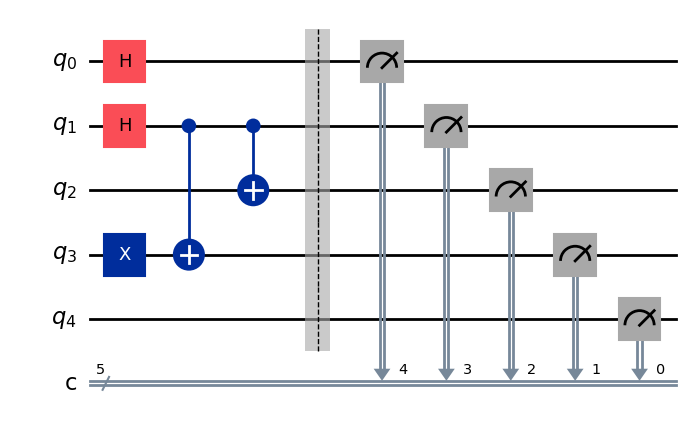

In [47]:
# Oracle for modular operations
# define the quantum circuit
qc = QuantumCircuit(5, 5)
# qc = QuantumCircuit(5)

# Oracle
qc.h(range(2))
qc.x(3)
qc.cx(1, 3)
qc.cx(1, 2)
qc.barrier()

# Measurement
qc.measure(range(5), range(4, -1, -1))

# draw the circuit
qc.draw('mpl')

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


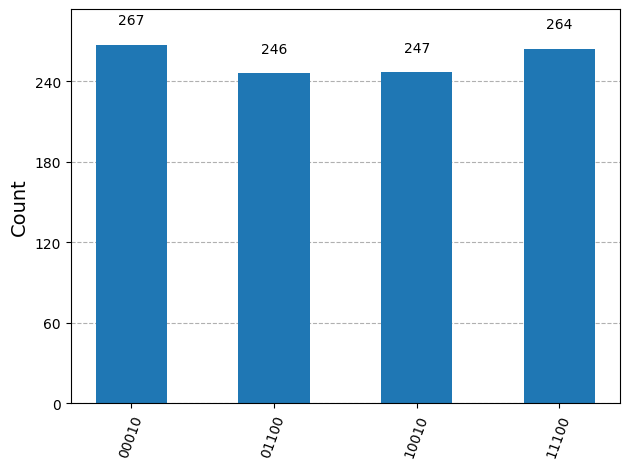

In [48]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1024)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# print the results as a state vector
print(result.get_statevector(compiled_circuit, decimals=3))
# Plot the results as a histogram
plot_histogram(counts)